# Logistic Regression implementation using Tensorflow

In [539]:
#import required modules

import tensorflow as tf
import numpy as np
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt

%matplotlib inline

In [560]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')
Features = data[:, 0:2]
labels = data[:, 2]

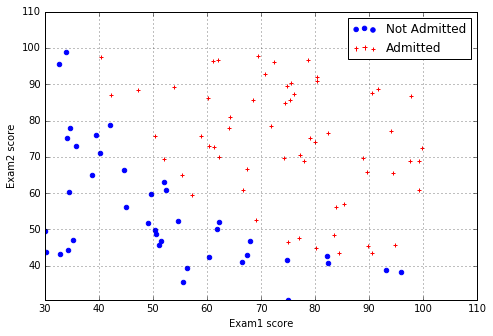

In [561]:
# Visualize input data

exam1, exam2 = Features[:, 0], Features[:, 1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([np.min(exam1), 110])  # 110 is choosen only to get some space for legend
ax.set_ylim([np.min(exam2), 110])

ax.scatter(exam1[labels == 0], exam2[labels == 0], color='blue', marker='o', label='Not Admitted');
ax.scatter(exam1[labels == 1], exam2[labels == 1], color='red', marker='+', label='Admitted');
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
ax.legend(loc='upper right')
ax.grid(axis='both')

The data represents scores of two Exams and their University admission status based on these scores

In [562]:
# Feature Normalization
mu = np.mean(Features, axis=0)
sigma = np.std(Features, axis=0)

Features = (Features - mu) / sigma

In [563]:
# in this dataset we know there are only two columns for X
m, n = Features.shape
print(m, n)

100 2


In [564]:
# Add Bias vector (intercept terms) which is a vector with all 1's
Features = np.hstack((np.ones((m,1)), Features))
labels = data[:, 2:3]

In [565]:
m1, n1 = Features.shape
print(m1, n1)

100 3


In [567]:
# Split the data into training set and test set
# 25% of data is separated as test set which is used to compute predictions and model behaviour
X_train, X_test, y_train, y_test = model_selection.train_test_split(Features, labels, test_size=0.25, random_state=40)

m_train, n_train = X_train.shape
m_test, n_test = X_test.shape

In [568]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z));

In [569]:
# Tensorflow parameters
alpha = 0.01 # learning rate
num_epochs = 2000 # no of times complete dataset is iterated

In [570]:
# specify variable data types
X = tf.placeholder(tf.float32, [m_train, n_train])
y = tf.placeholder(tf.float32, [m_train, 1])

# output parameters that fit the model
theta = tf.Variable(tf.zeros([n_train, 1]))

feed_dict = {X:X_train, y:y_train}

In [571]:
init = tf.global_variables_initializer()

In [572]:
# prediction hypothesis is the Sigmoid function h(x) = 1 / (1 + e^(-x));

hypothesis = tf.sigmoid(tf.matmul(X, theta));

In [573]:
# Cost function for Logistic Regression

cost = tf.reduce_sum((-1 * np.multiply(y, tf.log(hypothesis))) - np.multiply((1 - y), tf.log(1 - hypothesis))) / m_train;

In [574]:
# Initialize optimizer
training_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

In [575]:
error = np.empty(shape=[1],dtype=float)  # we will be appending cost/error of each iteration

# Train the model using training data
with tf.Session() as ssn:
    ssn.run(init);

    for epoch in range(num_epochs):
        ssn.run(training_step, feed_dict=feed_dict);
        error = np.append(error, ssn.run(cost, feed_dict=feed_dict));

    # save final parameters for computing predictions
    theta_fit = ssn.run(theta);

In [576]:
error[0:10]

array([ 0.01      ,  0.69143194,  0.68972546,  0.68802792,  0.68633926,
        0.68465936,  0.68298823,  0.68132573,  0.67967182,  0.67802656])

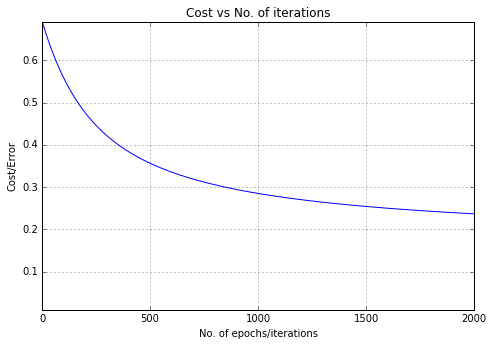

In [577]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([0, num_epochs])
ax.set_ylim([np.min(error), np.max(error)])
ax.plot(range(len(error)), error, color='blue');
ax.set_xlabel('No. of epochs/iterations')
ax.set_ylabel('Cost/Error')
ax.set_title('Cost vs No. of iterations')
ax.grid(axis='both')

In [578]:
# output parameters
theta_fit

array([[ 0.75521302],
       [ 1.89326608],
       [ 1.48466611]], dtype=float32)

In [453]:
# Make predictions with the parameters theta_fit
predict = np.round(sigmoid(np.matmul(X_test, theta_fit)))

In [579]:
pdata = np.concatenate((X_test[:, 1:], y_test), axis=1)
pdata = np.concatenate((pdata, predict), axis=1)

In [580]:
not_admitted_test = np.array(list(filter(lambda row: row[2] == 0, pdata)))
admitted_test = np.array(list(filter(lambda row: row[2] == 1, pdata)))
correct_predictions = np.array(list(filter(lambda row: row[2] == row[3], pdata)))

In [590]:
matching_results = np.mean(y_test == predict)

print('Accuracy: %.2f%%' % np.multiply(matching_results, 100))

Accuracy: 88.00%
